# Welcome to Workshop 4

# Today's Plan

- Work flow
- f-strings
- Documentation
- Optimizers
- Classes
- Exercise set 1

# Work flow
## Avoid overwriting your own work and merge conflicts
1. Create copies of everything you work on yourself
1. Put copies into seperate folders

## Create and import modules for functions!
1. Create a python file (.py)
1. Save it in the same folder as your python notebook file (.ipynb)
1. Use import statement to use the modules

## Restart the kernel and re-run the whole notebook frequently!!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

 

# f-strings

- Strings that combines text format and a variable
- print(f' text part here { variable_here }' )
- :.2f round to 2 decimals

In [2]:
variable_here = np.pi
print(f' text part here { variable_here:.2f}' )



 text part here 3.14


# Documentation
- '''  doc strings  '''
- \# comments


## Example function:

$$f(x) = sin(x)+0.05*x^2$$

In [3]:
def f(x):
    """
    Defines an equation.
    
    Args:
    x (list): list of variable arrays
    
    Returns:
    eq_1 (scalar): Function value
    """
    if len(x)==0: 
        raise ValueError ("No variables defined")
    elif len(x)==1: # to ensure input is valid - in this case only 1 allowed
        eq_1 = np.sin(x[0])+0.05*x[0]**2 
        return eq_1
    elif len(x)==2: # to ensure input is valid - in this case only 2 variables allowed
        eq_1 = np.sin(x[0])+0.05*x[1]**2 
        return eq_1
    elif len(x)>2: 
        raise ValueError ("Too many variables defined")

# Optimizers




# Whats going on under the hood?
- Largely depends on the method used!  
- Nelder-Mead is a downhill method, <br>
  whereas other algorithm use a lagrangian method to incoorporate constraints <br>
  e.g. consumer budget constraint
- Gif shows the Nelder-Mead method 

<img src="nelder-mead.gif" style="float:">

# Generate Data

In [4]:
N=100 # specify the number of grid point
x1_vec = np.linspace(-10,10,N) # draw N=100 evenly spaced numbers between -10 and 10
x = [x1_vec] #because function takes a list of arrays




In [5]:
# a. using scipy optmize
from scipy import optimize

x_guess = -10 # optimizer needs a starting point for the two values     
obj = lambda x:f(x) #objective function to optimize - in this case minimize

#b.optimizing objective function 
res = optimize.minimize(obj,x_guess,method="Nelder-Mead") #Nelder-mead is standard and simple method
print("-----------")
print(res.message)
print("-----------")

#c.unpacking results
x1_best_scipy = res.x[0]
f_best_scipy = res.fun

# d. print
print(f'Using numerical solver the optimal values are:')
print(f'Function = {f_best_scipy.item():.4f};  x1 = {x1_best_scipy:.4f}')

-----------
Optimization terminated successfully.
-----------
Using numerical solver the optimal values are:
Function = 1.7911;  x1 = -7.0689


In [6]:
opt = [x1_best_scipy,f_best_scipy.item()] # x1 and x2 in a list
print(opt)

[-7.06890869140625, 1.7911367947305687]


In [7]:
def twod_plot(x1_vec, opt):
    """
    Plots graph
    
    Args:
    x1_vec (numpy.ndarray): vector with values to plot
    
    Returns:
    eq_1 (scalar): Function value
    """
    fig = plt.figure(figsize=(10,5)) # define new figure object
    ax = fig.add_subplot(111) # add subplot
    ax.plot(x1_vec,f([x1_vec])) # plot 2-dimensional function
    ax.plot(opt[0], opt[1], 'ro')
    ax.text(opt[0] - 2, opt[1] + 0.5, f'Minimum is ({opt[0]:.3f}, {opt[1]:.3f})')
    #add lines
    for y in range(-1, 6):    
        plt.plot(range(-10,11), [y] * len(range(-10, 11)), "--", lw=0.5, color="black", alpha=0.3)

    ax.xaxis.label.set_fontsize(14) #set label fontsize to 14
    ax.yaxis.label.set_fontsize(14)
    ax.set(xlabel="$x_1$", ylabel = "$f(x_1)$",xlim = ([-10,10])) #set xlabel,ylabel and xlimit
    for item in ax.get_yticklabels()+ax.get_xticklabels(): # set ticklabels to fontsize 14
        item.set_fontsize(14)

    #remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    

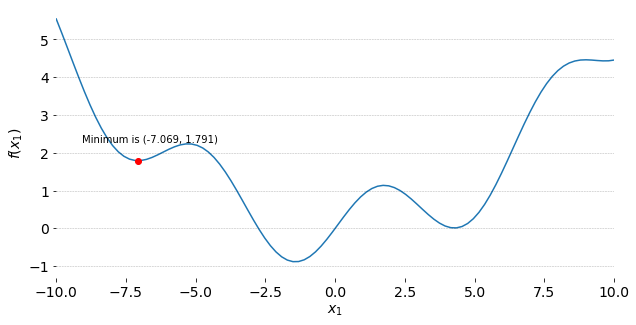

In [8]:
twod_plot(x1_vec, opt)






# Classes 

In [9]:
import optimum



In [10]:
model = optimum.optimum(N=1000, guess= -0)
opt = model.solve(disp = True)



-----------
Optimization terminated successfully.
-----------
Using numerical solver the optimal values are:
Function = -0.8879;  x1 = -1.4276


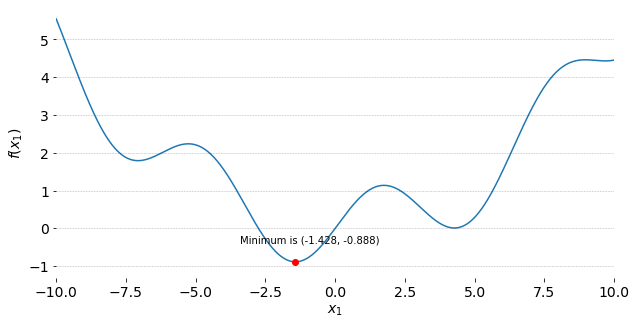

In [11]:
model.twod_plot(opt)



# Exercise 1